In [ ]:
# pip install statsmodels==0.12.0

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv

In [ ]:
Sparkling=pd.read_csv("/content/drive/MyDrive/Great Learnings Business Analyst/Time series forecasting/Project/Sparkling.csv",parse_dates=['YearMonth'],
                 index_col='YearMonth')
Sparkling.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


## Reading the data as an appropriate Time Series data and plotting the data.

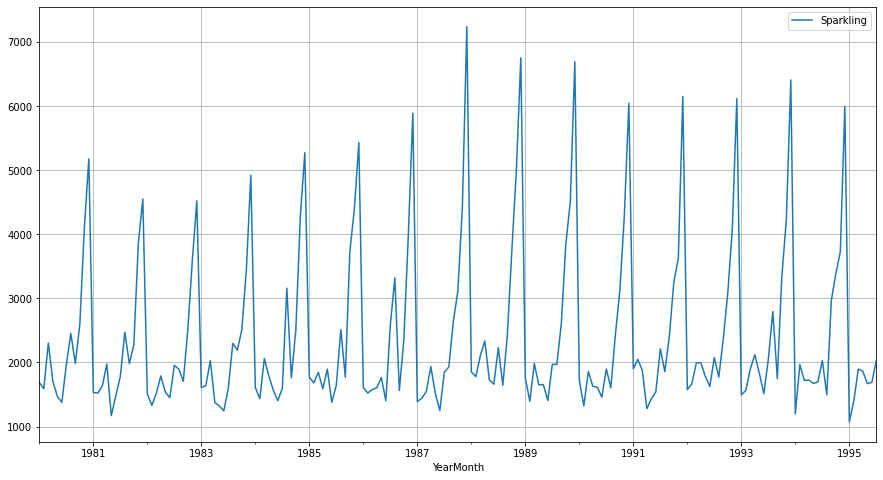

In [ ]:
from pylab import rcParams

rcParams['figure.figsize']=15,8

Sparkling.plot()
plt.grid();

### Observation:
From the above plot of Sparkling dataset we observe there is seasonality in the dataset. The trend couldnt be observed clearly

## Performing appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Describing the wine dataset

In [ ]:
Sparkling.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


### Observation:
From the above describe we observe that the data period is monthly and the count is 185 wine record for 185 months.

Mean: The average sales of wine is 90.3

STD: The average standard deviation between each month is 39.17

Min: The min sales of wine for a month is 28

Max: The max sales of wine for a month is 267.

In [ ]:
print('There are '+str(Sparkling.Sparkling.isnull().sum())+' Null values in the dataset')

There are 0 Null values in the dataset


### Visualizing the dataset

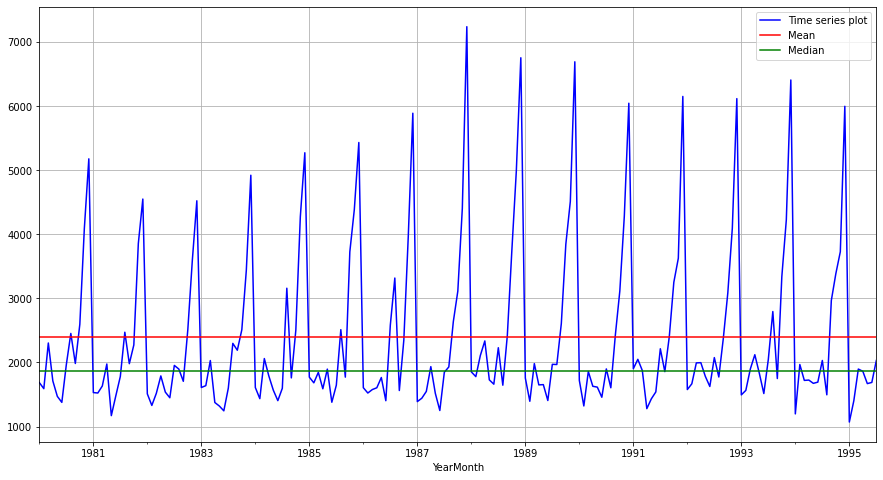

In [ ]:
Sparkling.plot(color='Blue')
plt.axhline(Sparkling.Sparkling.mean(),color='Red')
plt.axhline(Sparkling.Sparkling.median(),color='Green')
plt.grid()
plt.legend(['Time series plot','Mean','Median'])

### Observation:

From the above Time series plot and the mean and median we can observe that the Time series is almost stationary with no trend, we can find the stationality separately in ADFULLER test.

### Plotting a Quarterly sales graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


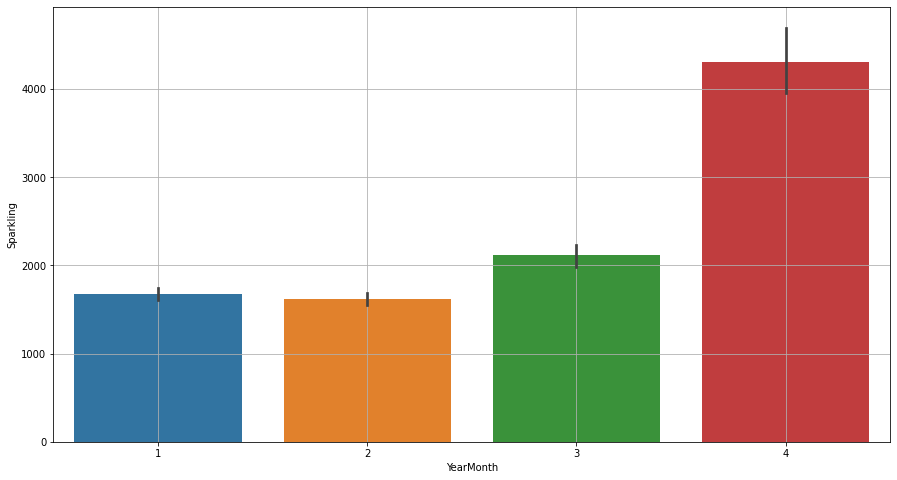

In [ ]:
sns.barplot(Sparkling.index.quarter,Sparkling.Sparkling,data=Sparkling)
plt.grid();

### Observation:
From the above Quarterly plot of the Sparkling dataset we can observe that Q4 shows the highest sales, Q3 shows the 2nd highest and Q1 shows the 3rd highest with Q2 as the lowest sales quarter.

### Year on Year Quarterly sales comparision

In [ ]:
quarterly_sales_across_years=pd.pivot_table(Sparkling,values='Sparkling',columns=Sparkling.index.quarter,index=Sparkling.index.year)
quarterly_sales_across_years

YearMonth,1,2,3,4
YearMonth,,,,
1980,1860.333333,1520.000000,2134.333333,3954.000000
1981,1562.000000,1542.000000,2078.000000,3560.333333
1982,1452.333333,1592.000000,1852.333333,3543.666667
1983,1759.000000,1313.333333,2029.666667,3624.666667
1984,1701.666667,1586.666667,2171.666667,4017.000000
1985,1766.333333,1621.333333,1976.000000,4516.333333
1986,1568.666667,1591.000000,2488.000000,4075.666667
1987,1459.666667,1567.666667,2138.333333,4920.333333
1988,1913.333333,1908.333333,2098.666667,5161.666667


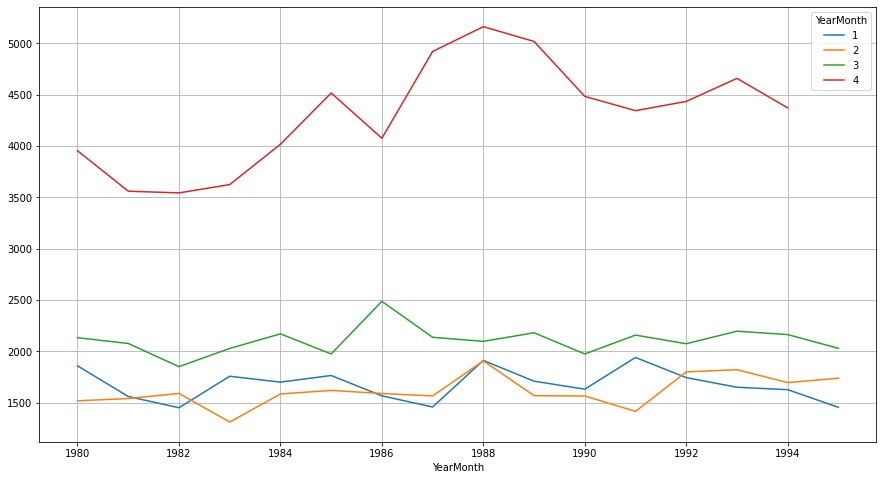

In [ ]:
quarterly_sales_across_years.plot()
plt.grid()

### Observation: 
From the above year-on-year quarterly graph we observe that on an average each year the quarter 4 sales are exceptionaly high. Q3 is the 2nd highest and the average sales are Q1 and Q2 are mixed over the years for example in the year 1982 Q2 is low compared to Q1 and in the year 1983 Q1 is low compared to Q2. The Highest sale happened in the year 1988 in the same year Q1 and Q2 sales are equal.

### Time series Decomposition

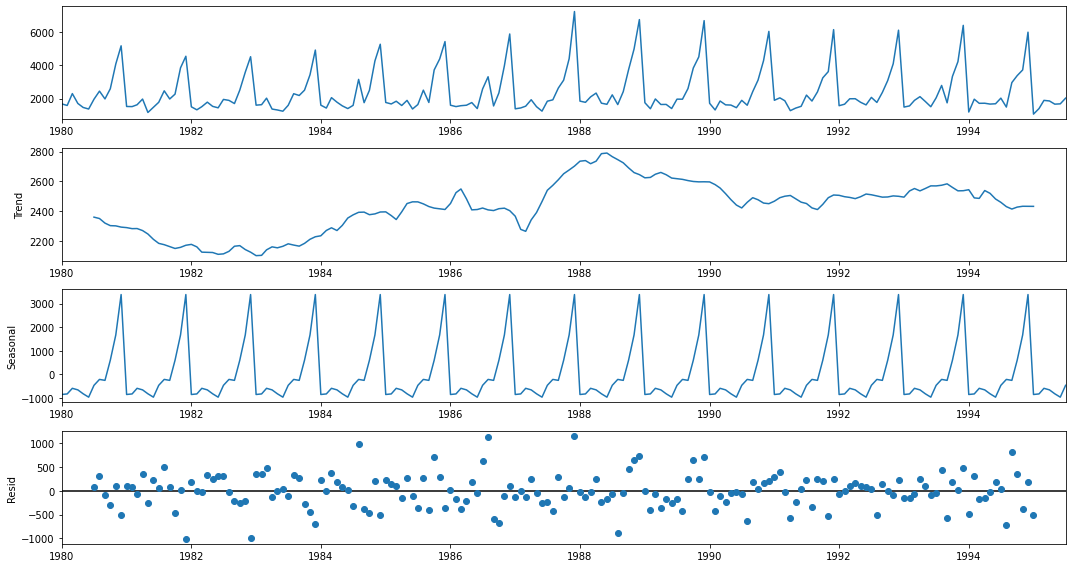

In [ ]:
  from statsmodels.tsa.seasonal import seasonal_decompose

  decom=seasonal_decompose(Sparkling,model='additive')
  decom.plot();

### Observation: 

We have decomposed the wine dataset time series using addition model.
From the above observation, we observe that there are seasonality and trend in the dataset.

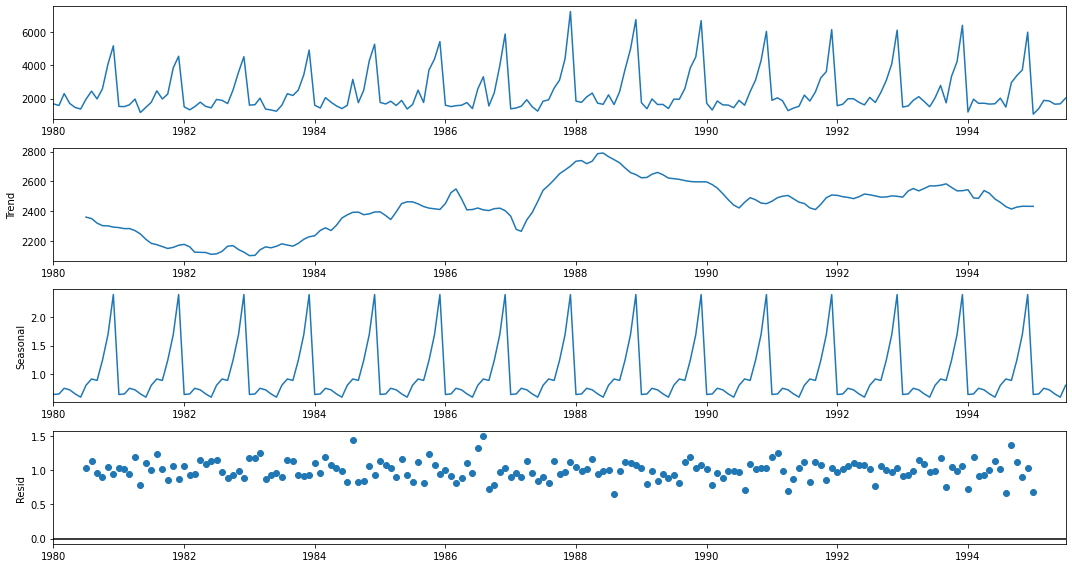

In [ ]:
decom=seasonal_decompose(Sparkling,model='multiplicative')
decom.plot();

### Observation:

From the above multiplicative decomposition of the wine dataset we observe that the trend is same as additive and towards downwards. The change in amplitute is also captured by the multiplicative modlel.

##Splitting the data into training and test. The test data should start in 1991.

In [ ]:
train=Sparkling[Sparkling.index.year<1991]
test=Sparkling[Sparkling.index.year>=1991]

In [ ]:
train.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [ ]:
test.head()

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


##Building various exponential smoothing models on the training data and evaluating the model using RMSE on the test data.Other models such as regression,naïve forecast models, simple average models etc. will be built on the training data and check the performance on the test data using RMSE.

In [ ]:
resultdf=pd.DataFrame({'Alpha values':[],'Test RMSE':[]})
resultdf

,Alpha values,Test RMSE


### Simple Exponential smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing,Holt,SimpleExpSmoothing
from sklearn import metrics

ses_train=train.copy()
ses_test=test.copy()

model_ses=SimpleExpSmoothing(ses_train.Sparkling)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [ ]:
for i in np.arange(0.01,1,0.01):
  model_ses_alpha=model_ses.fit(smoothing_level=i,optimized=False,use_brute=True)
  ses_test['Predict',i]=model_ses_alpha.forecast(steps=len(test))

  rmse_model1_test=metrics.mean_squared_error(ses_test.Sparkling,ses_test['Predict',i],squared=False)

  resultdf=resultdf.append({'Alpha values':i,'Test RMSE':round(rmse_model1_test,4)},ignore_index=True)

In [ ]:
resultdf.sort_values(by='Test RMSE',ascending=True,inplace=True)
resultdf=resultdf.iloc[0:1,:]
resultdf['index']='Simple Exponential'
resultdf.set_index('index',inplace=True)

In [ ]:
resultdf

,Alpha values,Test RMSE
index,,
Simple Exponential,0.02,1279.4952


### Double Exponential smoothing

In [ ]:
des_train=train.copy()
des_test=test.copy()

model_des=Holt(des_train.Sparkling)

resultdf_beta=pd.DataFrame({'Alpha values':[],'Beta values':[],'Test RMSE':[]})
resultdf_beta

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


,Alpha values,Beta values,Test RMSE


In [ ]:
for i in np.arange(0.01,1,0.01):
  for j in np.arange(0.01,1,0.01):
    model_des_alpha_beta=model_des.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)

    des_test['predict',i,j]=model_des_alpha_beta.forecast(steps=len(test))

    rmse_model2_test=metrics.mean_squared_error(des_test.Sparkling,des_test['predict',i,j],squared=False)

    resultdf_beta=resultdf_beta.append({'Alpha values':i,'Beta values':j,'Test RMSE':round(rmse_model2_test,4)},ignore_index=True)

In [ ]:
resultdf_beta.sort_values(by='Test RMSE',ascending=True,inplace=True)
resultdf_beta['index']='Double Exponential'
resultdf_beta=resultdf_beta.iloc[0:1,:]
resultdf_beta.set_index('index',inplace=True)
resultdf_beta

,Alpha values,Beta values,Test RMSE
index,,,
Double Exponential,0.02,0.5,1274.6308


### Triple Exponential Smoothing

In [ ]:
tes_train=train.copy()
tes_test=test.copy()

model_tes=ExponentialSmoothing(tes_train.Sparkling,trend='Additive',seasonal='multiplicative')
resultdf_gamma=pd.DataFrame({'Alpha values':[],'Beta values':[],'Gamma values':[],'Test RMSE':[]})
resultdf_gamma

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


,Alpha values,Beta values,Gamma values,Test RMSE


In [ ]:
for i in np.arange(0.1,1.1,0.1):
  for j in np.arange(0.1,1.1,0.1):
    for k in np.arange(0.1,1.1,0.1):
      model_tes_alpha_beta_gamma=model_tes.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)

      tes_test['predict',i,j,k]=model_tes_alpha_beta_gamma.forecast(steps=len(test))

      rmse_model3_test=metrics.mean_squared_error(tes_test.Sparkling,tes_test['predict',i,j,k],squared=False)

      resultdf_gamma=resultdf_gamma.append({'Alpha values':i,'Beta values':j,'Gamma values':k,'Test RMSE':round(rmse_model3_test,4)},ignore_index=True)

In [ ]:
resultdf_gamma.sort_values(by='Test RMSE',ascending=True,inplace=True)
resultdf_gamma['index']='Triple Exponential'
resultdf_gamma=resultdf_gamma.iloc[0:1,:]
resultdf_gamma.set_index('index',inplace=True)
resultdf_gamma

,Alpha values,Beta values,Gamma values,Test RMSE
index,,,,
Triple Exponential,0.4,0.1,0.2,336.7153


### Linear Regression Model

In [ ]:
lr_train_time=[i+1 for i in range(len(train))]
lr_test_time=[i+133 for i in range(len(test))]

print('Training Time instance','\n',lr_train_time)
print('Test Time instance','\n',lr_test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [ ]:
lr_train=train.copy()
lr_test=test.copy()
lr_train['time']=lr_train_time
lr_test['time']=lr_test_time
from sklearn.linear_model import LinearRegression

lr_train.head()

,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


In [ ]:
lr=LinearRegression()
lr.fit(lr_train[['time']],lr_train.Sparkling.values)
lr_model4=lr.predict(lr_test[['time']])
lr_test['predict']=lr_model4

rmse_model4_test=metrics.mean_squared_error(test.Sparkling,lr_test.predict,squared=False)

resultdf_lr=pd.DataFrame({'Test RMSE':rmse_model4_test},index=['Linear Regression'])

resultdf_lr

,Test RMSE
Linear Regression,1389.135175


### Naive Approach

In [ ]:
N_train=train.copy()
N_test=test.copy()

N_test['predict']=np.asarray(N_train.Sparkling)[len(np.asarray(N_train.Sparkling))-1]

rmse_model5_test=metrics.mean_squared_error(N_test.Sparkling,N_test.predict,squared=False)

resultdf_n=pd.DataFrame({'Test RMSE':round(rmse_model5_test,4)},index=['Naive Approach'])
resultdf_n

,Test RMSE
Naive Approach,3864.2794


### Simple Averages

In [ ]:
sa_train=train.copy()
sa_test=test.copy()

sa_test['predict']=sa_train.Sparkling.mean()

rmse_model6_test=metrics.mean_squared_error(sa_test.Sparkling,sa_test.predict,squared=False)

resultdf_sa=pd.DataFrame({'Test RMSE':round(rmse_model6_test,4)},index=['Simple Averages'])
resultdf_sa

,Test RMSE
Simple Averages,1275.0818


### concatenating all the model performances

In [ ]:
resultdf_final=pd.concat([resultdf.iloc[0:1,:],resultdf_beta.iloc[0:1,:],resultdf_gamma.iloc[0:1,:],resultdf_lr,resultdf_n,resultdf_sa])
resultdf_final

,Alpha values,Test RMSE,Beta values,Gamma values
Simple Exponential,0.02,1279.495200,NaN,NaN
Double Exponential,0.02,1274.630800,0.5,NaN
Triple Exponential,0.40,336.715300,0.1,0.2
Linear Regression,NaN,1389.135175,NaN,NaN
Naive Approach,NaN,3864.279400,NaN,NaN
Simple Averages,NaN,1275.081800,NaN,NaN


### Observation: 
From the above comparision table we observe that the least rmse score is for Triple Exponential smoothing model has the lowest RMSE with 336.71

### Plotting Triplet Exponential smoothing

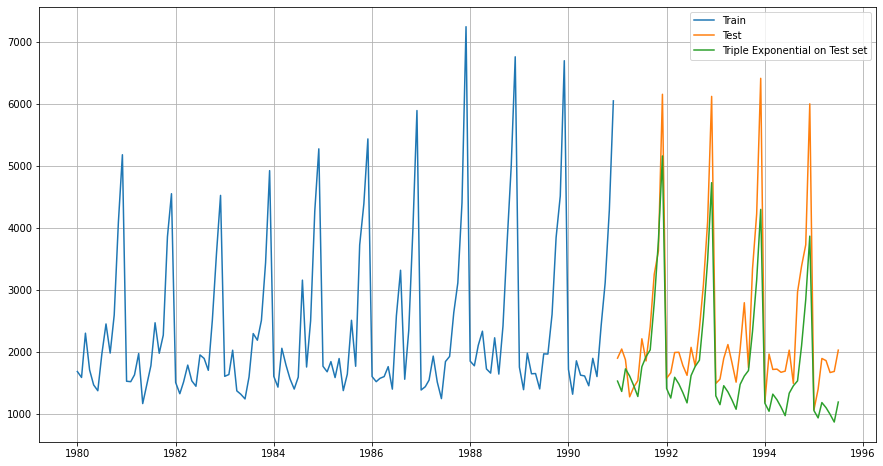

In [ ]:
plt.plot(tes_train.Sparkling,label='Train')
plt.plot(tes_test.Sparkling,label='Test')
plt.plot(tes_test['predict',0.1,0.2,0.2],label='Triple Exponential on Test set')
plt.legend(loc='best')

plt.grid();

### Conclusion:
From the above best two model plots we can observe that the Triple Exponential smoothing model give the best prediction forecast of the time series.

## Checking the stationarity of the data on which the model is being built on using appropriate statistical tests and also mentioning the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

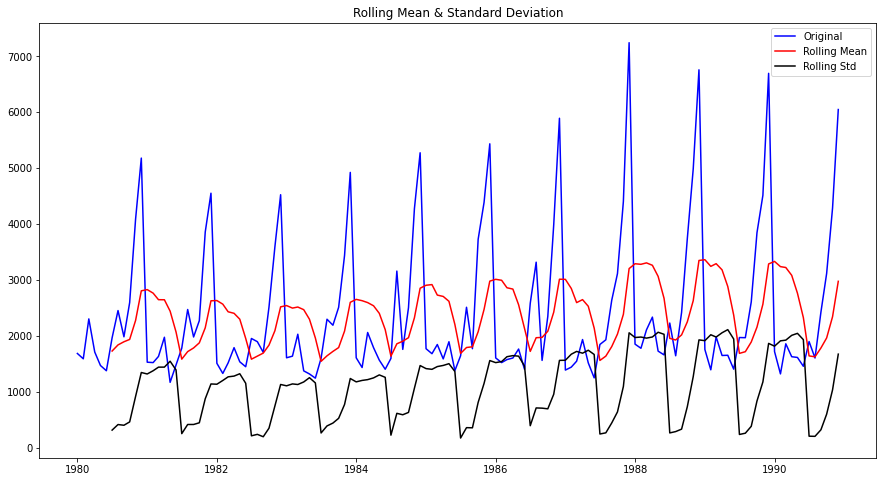

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [ ]:
test_stationarity(train.Sparkling)

### Observation:
The Null hypothesis of ADFuller test is that the time series is not stationary.

The alernate hypothesis is that the time series is stationary.

As we observer from the above plot the Time sereis is not stationary. As we observe from the pvalue- 0.669 statistically the time series is not stationary.

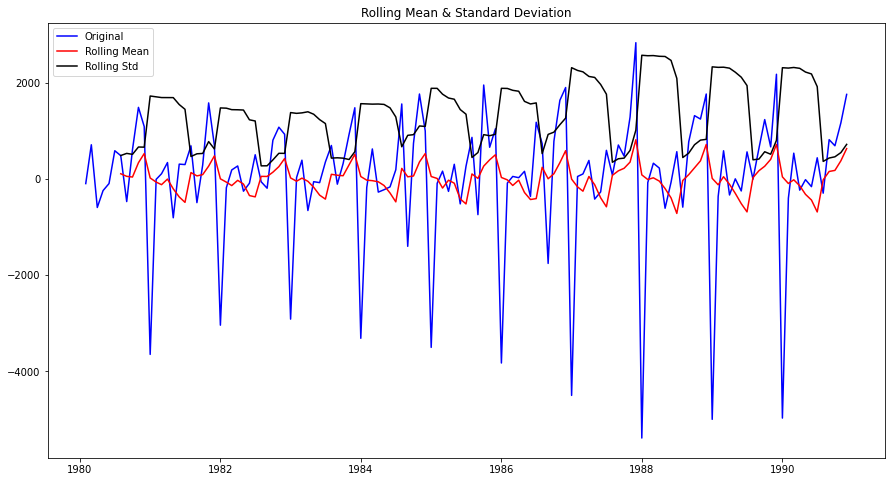

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [ ]:
test_stationarity(train.diff().dropna())

### Observation:

After applying difference to the power 1 we observe that the time series is stationary now. as we observe from the P-VALUE 2.2 * e^-12 the time series is statistically stationary.

### Checking for ACF and PACF of the training data

In [ ]:
train_diff=train.diff(1).dropna()
train_diff

,Sparkling
YearMonth,
1980-02-01,-95.0
1980-03-01,713.0
1980-04-01,-592.0
1980-05-01,-241.0
1980-06-01,-94.0
...,...
1990-08-01,-294.0
1990-09-01,819.0
1990-10-01,692.0


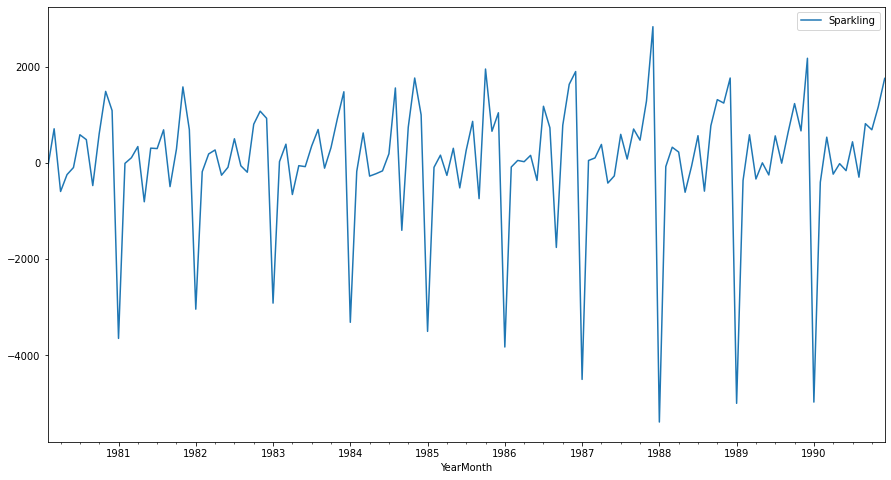

In [ ]:
train_diff.plot();

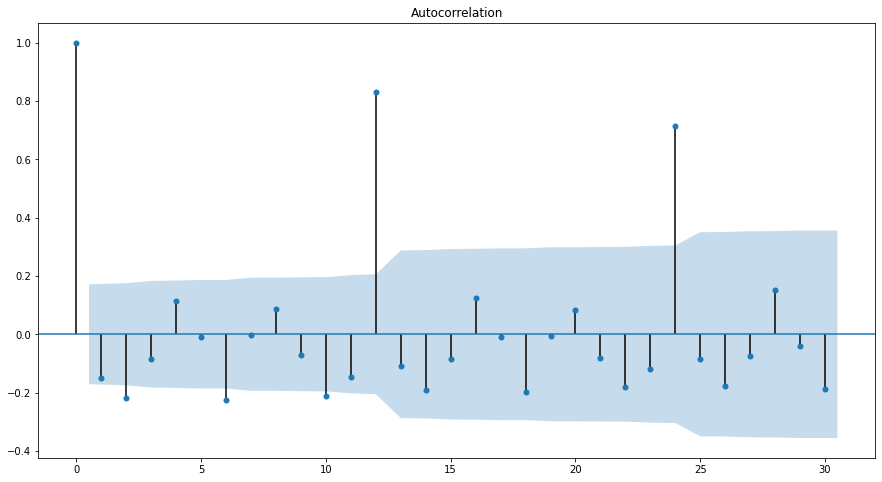

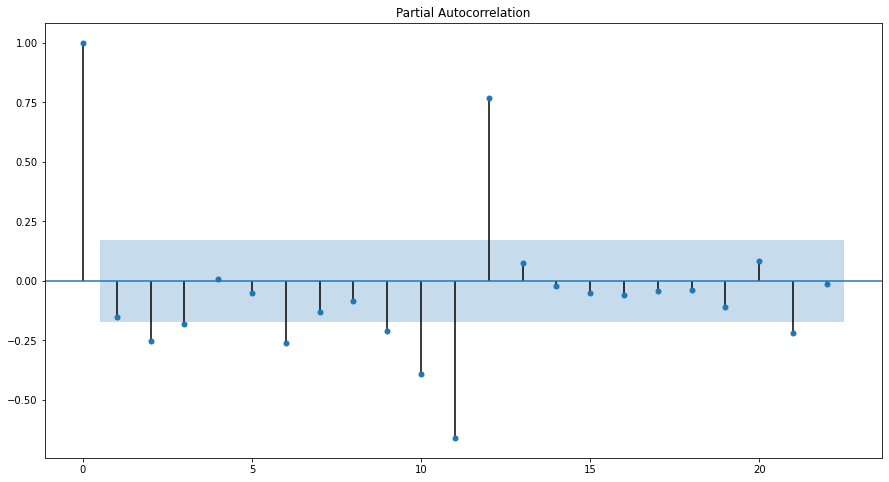

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


plot_acf(train_diff,lags=30);
plot_pacf(train_diff);

### Observation:
The ACF and PACF plots explains the correlation of current time lines with previous months. How much previous month data can explain the current month data. As we can observe from the ACF plot there is no significant information from previous months as the previous value is inside the band and out of significance.

The PACF plot is same as ACF, no significant information from previous data, but we can find the seasonality as 12 from the plot.

##Building an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Model Selection:

As we observe this time series have seasonality we are going to build SARIMA model

In [ ]:
import itertools

p=q=range(0,1)
d=range(1,2)
D=range(0,1)
pdq=list(itertools.product(p,d,q))
PDQ=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,D,q))] 
print('Parameter combination for the model..')
for i in range(1,len(pdq)):
  print('Model:{}{}'.format(pdq[i],PDQ[i]))

Parameter combination for the model..


In [ ]:
sarima_aic=pd.DataFrame(columns=['params','seasonal','AIC'])
sarima_aic

,params,seasonal,AIC


In [ ]:
import statsmodels.api as sm

for param in pdq:
  for param_seasonal in PDQ:
    sarima_model=sm.tsa.statespace.SARIMAX(train.Sparkling.values,
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationality=False,
                                           enforce_invertibility=False)
    results_sarima=sarima_model.fit(maxiter=1000)
    print('Sarima{} - AIC {}'.format(param,param_seasonal,results_sarima.aic))

    sarima_aic=sarima_aic.append({'params':param,'Seasonal':param_seasonal,'AIC':results_sarima.aic},ignore_index=True)


Sarima(0, 1, 0) - AIC (0, 0, 0, 12)


In [ ]:
sarima_aic=sarima_aic.sort_values(by='AIC',ascending=True).reset_index().drop('index',axis=1)
sarima_aic

,params,seasonal,AIC,Seasonal
0,"(0, 1, 0)",NaN,2267.663036,"(0, 0, 0, 12)"


In [ ]:
low_aic_param=(sarima_aic.iloc[0,0])
low_aic_param
low_aic_seasonal=(sarima_aic.iloc[0,3])
print(low_aic_param,low_aic_seasonal)

(0, 1, 0) (0, 0, 0, 12)


In [ ]:
mod=sm.tsa.statespace.SARIMAX(train.Sparkling,order=low_aic_param,seasonal_order=low_aic_seasonal,
                              enforce_stationarity=False,
                                enforce_invertibility=False)
results_sarima=mod.fit(maxiter=1000)

print(results_sarima.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1124.680
Date:                Sat, 22 May 2021   AIC                           2251.360
Time:                        07:26:45   BIC                           2254.227
Sample:                    01-01-1980   HQIC                          2252.525
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.899e+06   1.31e+05     14.543      0.000    1.64e+06    2.16e+06
Ljung-Box (L1) (Q):                   3.04   Jarque-Bera (JB):               194.29
Prob(Q):                              0.08   Pr

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Diagnostic Plot

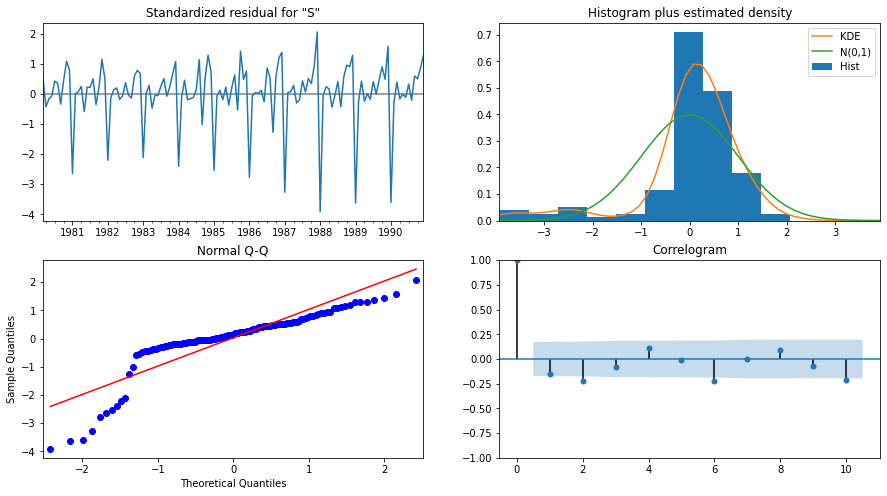

In [ ]:
results_sarima.plot_diagnostics();

### Observation:

From the above diagnostic plot for Arima model, we observe the below points.

1. Residual- The residuals have a definite pattern
2. Normal Q-Q- The points are not close to the line uniformly.
3. Histogram: Not a normal distribution
4. Correlogram: There are points above the band which say we cannot implement the model.

Based on the above points we can conclude the model is not good

### Model Evaluation

In [ ]:
predicted_auto_sarima=results_sarima.forecast(steps=len(test))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

rmse = metrics.mean_squared_error(test.Sparkling,predicted_auto_sarima,squared=False)
mape = mean_absolute_percentage_error(test.Sparkling,predicted_auto_sarima)
print('RMSE:',rmse,'\nMAPE:',mape)
sarima_auto=pd.DataFrame({'Test RMSE':rmse,'Test MAPE':mape},index=['Sarima_Auto'])
sarima_auto

RMSE: 3864.2793518443914 
MAPE: 201.32764950352743


,Test RMSE,Test MAPE
Sarima_Auto,3864.279352,201.32765


##Building ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Model Selection: We are going to build SARIMA model as the time series contains seasonality

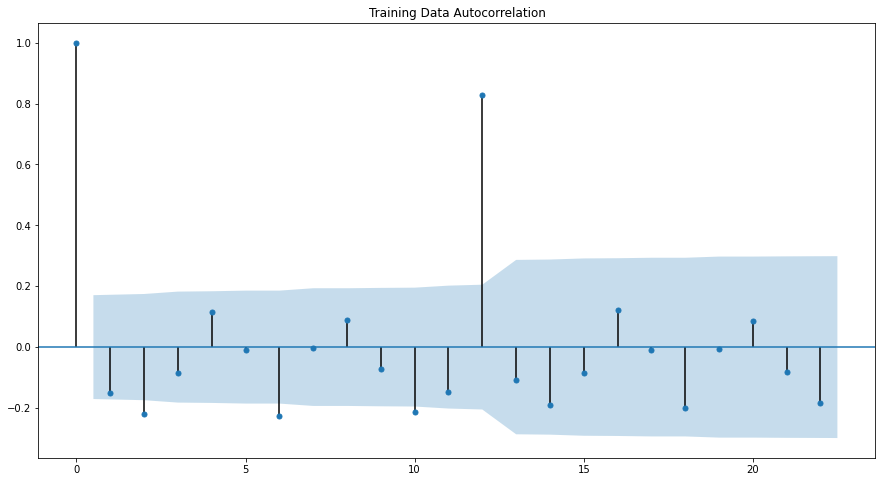

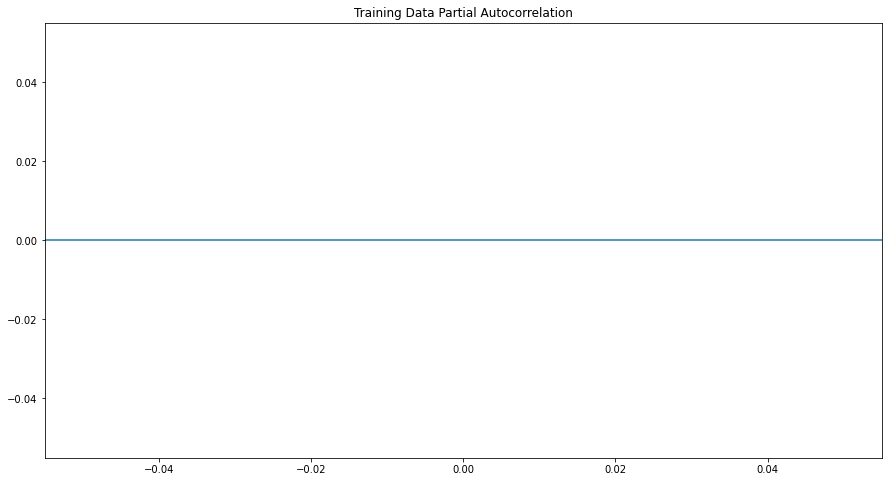

In [ ]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');
plot_pacf(train.diff(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

### Observation: 
From the above ACF plot we observe that the seasonality is 12.

1. The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 0.
2. The Auto-Regressive part P is 0 as we observed from the above plot.

In [ ]:
sarima_aic_man=pd.DataFrame(columns=['params','seasonal','AIC'])
sarima_aic_man

sarima_model_man=sm.tsa.statespace.SARIMAX(train.Sparkling.values,
                                           order=(0,1,0),
                                           seasonal_order=(0,0,0,12),
                                           enforce_stationality=False,
                                           enforce_invertibility=False)
results_sarima_man=sarima_model_man.fit(maxiter=1000)
print('Sarima{} - AIC {}'.format(param,param_seasonal,results_sarima_man.aic))

sarima_aic_man=sarima_aic_man.append({'params':param,'Seasonal':param_seasonal,'AIC':results_sarima_man.aic},ignore_index=True)

Sarima(0, 1, 0) - AIC (0, 0, 0, 12)


In [ ]:
sarima_aic_man

,params,seasonal,AIC,Seasonal
0,"(0, 1, 0)",NaN,2267.663036,"(0, 0, 0, 12)"


### Observation:
We have build a SARIM model from the observed PDQS parameters from the PACF,ACF plots and we get an AIC value of 2267.66

### Model Evaluation

In [ ]:
results_sarima_man=results_sarima_man.forecast(steps=len(test))

rmse = metrics.mean_squared_error(test.Sparkling,results_sarima_man,squared=False)
mape = mean_absolute_percentage_error(test.Sparkling,results_sarima_man)
print('RMSE:',rmse,'\nMAPE:',mape)

sarima_man=pd.DataFrame({'Test RMSE':rmse,'Test MAPE':mape},index=['Sarima_Manual'])
sarima_man

RMSE: 3864.2793518443914 
MAPE: 201.32764950352743


,Test RMSE,Test MAPE
Sarima_Manual,3864.279352,201.32765


##Creating a dataframe with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [ ]:
resultdf_final=resultdf_final.append([sarima_auto,sarima_man])

In [ ]:
resultdf_final['Rounded_four']=resultdf_final['Test RMSE'].apply(lambda x: round(x,4))
resultdf_final.sort_values(by='Rounded_four',ascending=True)

,Alpha values,Test RMSE,Beta values,Gamma values,Test MAPE,Rounded_four
Triple Exponential,0.40,336.715300,0.1,0.2,NaN,336.7153
Double Exponential,0.02,1274.630800,0.5,NaN,NaN,1274.6308
Simple Averages,NaN,1275.081800,NaN,NaN,NaN,1275.0818
Simple Exponential,0.02,1279.495200,NaN,NaN,NaN,1279.4952
Linear Regression,NaN,1389.135175,NaN,NaN,NaN,1389.1352
Naive Approach,NaN,3864.279400,NaN,NaN,NaN,3864.2794
Sarima_Auto,NaN,3864.279352,NaN,NaN,201.32765,3864.2794
Sarima_Manual,NaN,3864.279352,NaN,NaN,201.32765,3864.2794


### Observation: 

From the above models the least RMSE is provided by Triple Exponential Smoothing

##predicting 12 months into the future with appropriate confidence intervals/bands.

### Plotting the original Data

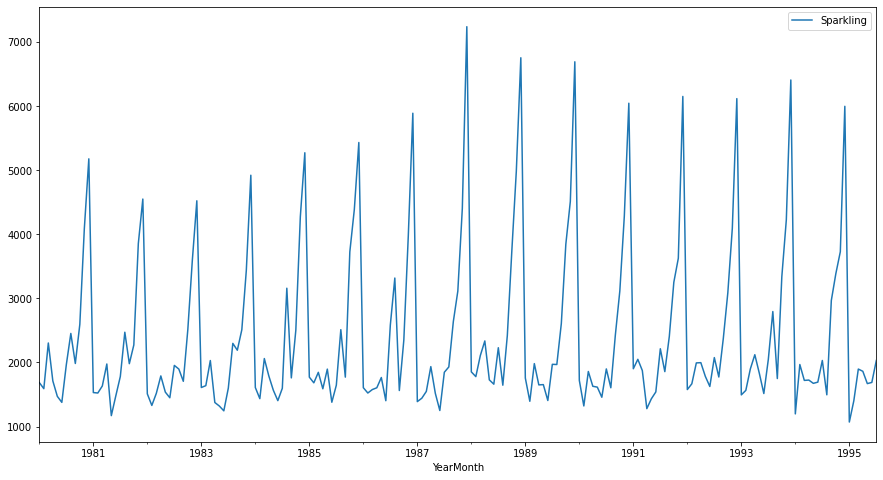

In [ ]:
Sparkling.plot()

In [ ]:
optimum=ExponentialSmoothing(Sparkling,trend='additive',
                             seasonal='multiplicative').fit(smoothing_level=0.40,
                                                            smoothing_trend=0.10,
                                                            smoothing_seasonal=0.2)
                             
optimum_rmse=metrics.mean_squared_error(Sparkling.Sparkling,optimum.fittedvalues,squared=False)

print('RMSE :',optimum_rmse)

RMSE : 377.2210875019173


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


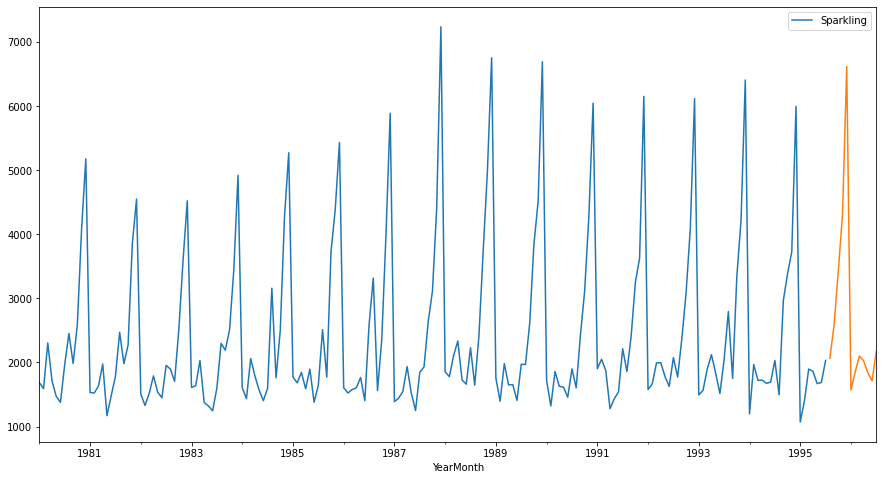

In [ ]:
fullpred=optimum.forecast(steps=12)
Sparkling.plot();
fullpred.plot();

In [ ]:
pred_1_df = pd.DataFrame({'lower_CI':fullpred - 1.96*np.std(optimum.resid,ddof=1),
                          'prediction':fullpred,
                          'upper_ci': fullpred + 1.96*np.std(optimum.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,1322.835821,2064.171701,2805.507581
1995-09-01,1839.611268,2580.947148,3322.283028
1995-10-01,2678.774834,3420.110714,4161.446594
1995-11-01,3569.997323,4311.333203,5052.669083
1995-12-01,5878.279276,6619.615157,7360.951037


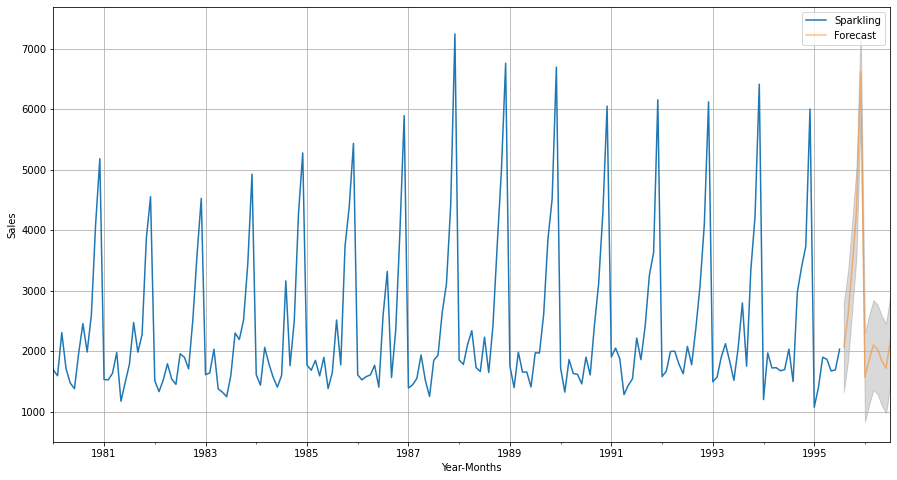

In [ ]:
axis = Sparkling.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

##Measures that the company should be taking for future sales.

### Observation:

From the above forecasted plot with confidence intervals, we observe that there is a steady rise till end of year 1995 and then a downfall at the beginning of year 1996 and a gradual increase and drop in the first half of the year 1996.

We can observe a pattern here, From the above EDA Graphs we observed that the sales is increasing steadily from q1 to q4. Q4 have the maximum sales. For the predicted year also we find the same pattern. The Q3 and Q4 of year 1995 having a gradual increase due to festival season and people consume more wine. After that during the year of 1996 1st and 2nd Quarter we observe that its starts as low and increasing and decreasing gradually.


### Conclusion:

More Sales happen in Q3 and Q4, so we can focus on the Q3 and Q4 to improve the existing sales by providing discounts and introducing new products in these months.